<span style="color: darkblue; font-family: Calibri; font-size: 22px;">
<b>LONDON HOUSES PRICE PREDICTION PROJECT</b>
</span>


<span style="color: darkblue; font-family: Calibri;">
I am setting up the environment for data analysis and visualisation by importing the libraries and modules I need for this project. I also ask Python to ignore the warnings that might be generated during the execution of the codes. 
</span>


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,5)
import warnings
warnings.filterwarnings('ignore')

<span style="color: darkblue; font-family: Calibri; font-size: 20px;">
<br><b>DATA EXPLORATION<b><br>
</span>


<span style="color: darkblue; font-family: Calibri; ">
I create my DataFrame london_houses that contains the csv file and I will explore its properties which would be helpful for the furter analysis.

</span>

In [3]:
london_houses = pd.read_csv('London_houses_raw_file.csv')

In [5]:
london_houses.head(3)

,no,property_name,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code
0,1910,Buckston Browne Gardens,"1,900,000.00",House,4558,5,3.0,3,Orpington,Kent,BR67FF
1,1122,Coppice Row,"1,265,000.00",House,2568,5,4.0,3,Epping,Essex,CM167DN
2,401,Piercing Hill,"799,999.00",House,1507,4,2.0,3,NaN,Essex,CM167JN


<span style="color: darkblue; font-family: Calibri;">
I will delete 'property_name' column as it's irrelevant for my analysis, I will keep 'no' column at the moment as it might be useful later on
</span>

In [7]:
london_houses = london_houses.drop(['property_name'], axis = 1)

In [9]:
london_houses.head(2)

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code
0,1910,"1,900,000.00",House,4558,5,3.0,3,Orpington,Kent,BR67FF
1,1122,"1,265,000.00",House,2568,5,4.0,3,Epping,Essex,CM167DN


In [11]:
london_houses.shape

(3480, 10)

In [13]:
london_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no           3480 non-null   int64  
 1    price       3480 non-null   object 
 2   house_type   3480 non-null   object 
 3   sqft         3480 non-null   int64  
 4   bedrooms     3480 non-null   int64  
 5   bathrooms    3452 non-null   float64
 6   receptions   3480 non-null   int64  
 7   location     3462 non-null   object 
 8   city         3480 non-null   object 
 9   postal_code  3480 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 272.0+ KB


In [15]:
london_houses.columns

Index(['no', ' price ', 'house_type', 'sqft', 'bedrooms', 'bathrooms',
       'receptions', 'location', 'city', 'postal_code'],
      dtype='object')

In [17]:
london_houses.describe()

,no,sqft,bedrooms,bathrooms,receptions
count,3480.000000,3480.000000,3480.000000,3452.000000,3480.000000
mean,1739.500000,1712.973563,3.103736,2.504345,2.006034
std,1004.733796,1364.259351,1.517698,1.123358,1.058625
min,0.000000,274.000000,0.000000,0.000000,0.000000
25%,869.750000,834.000000,2.000000,2.000000,1.000000
50%,1739.500000,1310.000000,3.000000,2.000000,2.000000
75%,2609.250000,2157.250000,4.000000,3.000000,3.000000
max,3479.000000,15405.000000,10.000000,6.000000,5.000000


<span style="color: darkblue; font-family: Calibri;">
From the inital inspection of my DataFrame I gathered the following information:<br>
- the column names are not consistant, <br>
- columns data types need to be revised further (e.g. column containing the numerical values of prices is of the object data type), <br>
- there are missing values in my DataFrame (bathroom and location columns) that need to be explored further.<br>
</span>

<span style="color: darkblue; font-family: Calibri; font-size: 20px;">
<br> <b>DATA CLEANING<b><BR>
</span>

<span style="color: darkblue; font-family: Calibri;">
I will start by ensuring the consistency of the column names by removing the leading/trailing whitespaces.
</span>

In [19]:
london_houses.columns = london_houses.columns.str.strip()
london_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no           3480 non-null   int64  
 1   price        3480 non-null   object 
 2   house_type   3480 non-null   object 
 3   sqft         3480 non-null   int64  
 4   bedrooms     3480 non-null   int64  
 5   bathrooms    3452 non-null   float64
 6   receptions   3480 non-null   int64  
 7   location     3462 non-null   object 
 8   city         3480 non-null   object 
 9   postal_code  3480 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 272.0+ KB


<span style="color: darkblue; font-family: Calibri;">
I will deal now with the NaN values in my DataFrame by checking the number of missing values in every column.
</span>

In [23]:
london_houses.isna().sum()

no              0
price           0
house_type      0
sqft            0
bedrooms        0
bathrooms      28
receptions      0
location       18
city            0
postal_code     0
dtype: int64

<span style="color: darkblue; font-family: Calibri;">
I have 28 missing values in the column 'bathrooms' and 18 msising values in the column 'location'. I will start my analysis by displaying all rows with the missing values in the column 'location'.
</span>

In [25]:
london_houses[london_houses['location'].isna()]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code
2,401,"799,999.00",House,1507,4,2.0,3,NaN,Essex,CM167JN
10,458,"950,000.00",House,3006,5,3.0,3,NaN,Surrey,CR53PG
47,2335,"575,000.00",Flat / Apartment,701,2,2.0,1,NaN,London,E148JX
48,3317,"1,700,000.00",Flat / Apartment,1771,3,2.0,2,NaN,London,E148RJ
49,3180,"875,000.00",Flat / Apartment,1278,2,2.0,1,NaN,London,E148RJ
303,3104,"950,000.00",Flat / Apartment,870,2,2.0,1,NaN,London,EC1N8TE
305,3365,"450,000.00",Flat / Apartment,675,2,2.0,1,NaN,London,EC1R0LN
306,3361,"1,500,000.00",Flat / Apartment,1494,4,3.0,3,NaN,London,EC1R1XP
307,2446,"650,000.00",Flat / Apartment,562,1,1.0,1,NaN,London,EC1R1XW
324,819,"500,000.00",Flat / Apartment,561,1,1.0,1,NaN,London,EC1V1AG


<span style="color: darkblue; font-family: Calibri;">
I wanto to have a quick look at the unique values in the column 'location'. I will display the first 20 values.
</span>

In [27]:
london_houses['location'].unique()[:20]

array([' Orpington', ' Epping', nan, 'Coulsdon', 'Chipstead', ' Coulsdon',
       'London', 'CanaryWharf', 'Limehouse', 'Spitalfields',
       'Whitechapel', 'Shoreditch', 'RoyalAlbertWharf', 'StarPlace',
       'Hackney', 'Bow', ' Clapton', ' The Otto Buildings', ' Downs Road',
       'Homerton'], dtype=object)

In [29]:
london_houses['location'].nunique()

246

<span style="color: darkblue; font-family: Calibri;">
I am tiding up the data in the 'location' by removing the leading/trailing whitespaces.
</span>

In [31]:
london_houses['location'] = london_houses['location'].str.strip()
london_houses['location'].unique()[:20]

array(['Orpington', 'Epping', nan, 'Coulsdon', 'Chipstead', 'London',
       'CanaryWharf', 'Limehouse', 'Spitalfields', 'Whitechapel',
       'Shoreditch', 'RoyalAlbertWharf', 'StarPlace', 'Hackney', 'Bow',
       'Clapton', 'The Otto Buildings', 'Downs Road', 'Homerton',
       'SouthHackney'], dtype=object)

<span style="color: darkblue; font-family: Calibri;">
I am displaying all rows with the missing values in the column 'location'.
</span>

In [33]:
london_houses[london_houses['location'].isna()]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code
2,401,"799,999.00",House,1507,4,2.0,3,NaN,Essex,CM167JN
10,458,"950,000.00",House,3006,5,3.0,3,NaN,Surrey,CR53PG
47,2335,"575,000.00",Flat / Apartment,701,2,2.0,1,NaN,London,E148JX
48,3317,"1,700,000.00",Flat / Apartment,1771,3,2.0,2,NaN,London,E148RJ
49,3180,"875,000.00",Flat / Apartment,1278,2,2.0,1,NaN,London,E148RJ
303,3104,"950,000.00",Flat / Apartment,870,2,2.0,1,NaN,London,EC1N8TE
305,3365,"450,000.00",Flat / Apartment,675,2,2.0,1,NaN,London,EC1R0LN
306,3361,"1,500,000.00",Flat / Apartment,1494,4,3.0,3,NaN,London,EC1R1XP
307,2446,"650,000.00",Flat / Apartment,562,1,1.0,1,NaN,London,EC1R1XW
324,819,"500,000.00",Flat / Apartment,561,1,1.0,1,NaN,London,EC1V1AG


<span style="color: darkblue; font-family: Calibri;">
The values in the 'location' column are missing, but as the column 'postal_code' contains complete information I can use it to fill in blank values. I did the online search and found the csv file containing the London post codes along with the corresponding wards and districts. I will create a new DataFrame called postcodes and I will examine the content.
</span>

In [35]:
postcodes = pd.read_csv('London postcodes.csv')
postcodes.head()

,Postcode,County,District,Ward
0,BR1 1AA,Greater London,Bromley,Bromley Town
1,BR1 1AB,Greater London,Bromley,Bromley Town
2,BR1 1AD,Greater London,Bromley,Bromley Town
3,BR1 1AE,Greater London,Bromley,Bromley Town
4,BR1 1AF,Greater London,Bromley,Bromley Town


<span style="color: darkblue; font-family: Calibri;">
I only need 2 columns of this dataset - 'Postcode' and 'Ward' therefore I will create my DataFrame again only with the selected columns.
</span>

In [37]:
postcodes = pd.read_csv('London postcodes.csv', usecols = ['Postcode', 'Ward'])
postcodes.head()

,Postcode,Ward
0,BR1 1AA,Bromley Town
1,BR1 1AB,Bromley Town
2,BR1 1AD,Bromley Town
3,BR1 1AE,Bromley Town
4,BR1 1AF,Bromley Town


In [39]:
postcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330589 entries, 0 to 330588
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Postcode  330589 non-null  object
 1   Ward      330589 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB


In [41]:
postcodes.describe()

,Postcode,Ward
count,330589,330589
unique,330589,693
top,BR1 1AA,West End
freq,1,13702


In [43]:
postcodes.columns

Index(['Postcode', 'Ward'], dtype='object')

<span style="color: darkblue; font-family: Calibri;">
I will change the names of the columns to the lowercase and I will replace the 'Postcode' column with the name 'postal_code' matching the column name in the london_houses DataFrame. 

</span>

In [45]:
postcodes.columns = ['postal_code', 'ward']

<span style="color: darkblue; font-family: Calibri;">
I will check the values stored in the 'postal_code' column.
</span>

In [47]:
postcodes['postal_code'].unique()

array(['BR1 1AA', 'BR1 1AB', 'BR1 1AD', ..., 'WD3 8XD', 'WD6 2RN',
       'WD6 2RW'], dtype=object)

<span style="color: darkblue; font-family: Calibri;">
As in my main DataFrame (london_houses) there is no space between the characters in the 'postal_code' column, I will remove the spaces in the 'postal_code' data in the postcodes DataFrame to keep the data consistent:
</span>

In [49]:
postcodes['postal_code'] = postcodes['postal_code'].str.replace(' ', '')

<span style="color: darkblue; font-family: Calibri;">
Every time I do a change to my dataset I display the first rows of the altered DataFrame to make sure everything worked ok.
</span>

In [51]:
postcodes.head()

,postal_code,ward
0,BR11AA,Bromley Town
1,BR11AB,Bromley Town
2,BR11AD,Bromley Town
3,BR11AE,Bromley Town
4,BR11AF,Bromley Town


<span style="color: darkblue; font-family: Calibri;">
Now I am ready to combine my 2 datasets based on a common column 'postal_code' - I do left join to maintain all the records of my london_houses DataFrame and enrich them with additional geographical information from postcodes DataFrame, I will create 'merged' variable:
</span>

In [53]:
df = pd.merge(london_houses, postcodes, on = 'postal_code', how = 'left')

<span style="color: darkblue; font-family: Calibri;">
This time I will display the last rows of my DataFrame for a change.
</span>

In [55]:
df.tail()

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code,ward
3475,2342,"1,695,000.00",House,5242,8,5.0,5,Watford,Watford,WD194TS,NaN
3476,2283,"825,000.00",Flat / Apartment,1819,3,2.0,2,King Edward Place,Bushey,WD232RG,NaN
3477,3138,"600,000.00",Flat / Apartment,1219,3,2.0,2,Bushey,Hertfordshire,WD232RH,NaN
3478,1384,"600,000.00",House,1202,4,2.0,2,Bushey,Hertfordshire,WD233EW,NaN
3479,224,"1,650,000.00",House,4016,8,5.0,5,Radlett,Hertfordshire,WD79HJ,NaN


In [57]:
df['ward'].isna().sum()

244

<span style="color: darkblue; font-family: Calibri;">
There are 244 missing values in the new column 'ward' - I am guessing it's because my postcodes dataset contains information solely related to London, whereas my london_houses dataset includes the information about towns/counties neighboring London as well.
</span>

<span style="color: darkblue; font-family: Calibri;">
I am checking the rows with missing values in my 'location' column against the 'ward' column. 
</span>

In [59]:
df[df['location'].isna()]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code,ward
2,401,"799,999.00",House,1507,4,2.0,3,NaN,Essex,CM167JN,NaN
10,458,"950,000.00",House,3006,5,3.0,3,NaN,Surrey,CR53PG,NaN
47,2335,"575,000.00",Flat / Apartment,701,2,2.0,1,NaN,London,E148JX,Canary Wharf
48,3317,"1,700,000.00",Flat / Apartment,1771,3,2.0,2,NaN,London,E148RJ,Canary Wharf
49,3180,"875,000.00",Flat / Apartment,1278,2,2.0,1,NaN,London,E148RJ,Canary Wharf
303,3104,"950,000.00",Flat / Apartment,870,2,2.0,1,NaN,London,EC1N8TE,Holborn & Covent Garden
305,3365,"450,000.00",Flat / Apartment,675,2,2.0,1,NaN,London,EC1R0LN,Clerkenwell
306,3361,"1,500,000.00",Flat / Apartment,1494,4,3.0,3,NaN,London,EC1R1XP,Clerkenwell
307,2446,"650,000.00",Flat / Apartment,562,1,1.0,1,NaN,London,EC1R1XW,Clerkenwell
324,819,"500,000.00",Flat / Apartment,561,1,1.0,1,NaN,London,EC1V1AG,St Peter's & Canalside


<span style="color: darkblue; font-family: Calibri;">
I am replacing the NaN values in the 'location' column with the corresponding 'ward' data for each row that has missing values. I will deal with 2 missing values in the 'ward' column later on.
</span>

In [61]:
df['location'] = np.where(df['location'].isna(), df['ward'], df['location'])

<span style="color: darkblue; font-family: Calibri;">
I am checking how many missing values have remained.  
</span>

In [63]:
df[df['location'].isna()]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code,ward
2,401,"799,999.00",House,1507,4,2.0,3,NaN,Essex,CM167JN,NaN
10,458,"950,000.00",House,3006,5,3.0,3,NaN,Surrey,CR53PG,NaN


<span style="color: darkblue; font-family: Calibri;">
2 missing values remained - I will replaced them with the values in the 'city' column, the rest of the values remain intact.
</span>

In [65]:
df['location'] = np.where(df['location'].isna(), df['city'], df['location'])

<span style="color: darkblue; font-family: Calibri;">
I am checking now the most and the least popular locations in my datasets.
</span>

In [67]:
df['location'].value_counts()

location
Battersea             214
Putney                168
Wandsworth            151
Clapham               123
Fulham                122
                     ... 
Stapleford Abbotts      1
Suttons Lane            1
BelgraveGardens         1
MalvernRoad             1
Radlett                 1
Name: count, Length: 232, dtype: int64

In [69]:
df['location'].unique()

array(['Orpington', 'Epping', 'Essex', 'Coulsdon', 'Chipstead', 'Surrey',
       'London', 'CanaryWharf', 'Limehouse', 'Canary Wharf',
       'Spitalfields', 'Whitechapel', 'Shoreditch', 'RoyalAlbertWharf',
       'StarPlace', 'Hackney', 'Bow', 'Clapton', 'The Otto Buildings',
       'Downs Road', 'Homerton', 'SouthHackney', 'BanburyRoad',
       'Farringdon', 'SmithfieldMarket', 'CityOfLondon', 'Clerkenwell',
       'Holborn & Covent Garden', 'Finsbury', "St Peter's & Canalside",
       'Hoxton West', 'Peartree Street', 'Bunhill', 'Islington',
       'WaterLane', 'Billingsgate', 'Waltham Abbey', 'Upshirebury Green',
       'Harrow On The Hill', 'Ruislip', 'Pinner', 'Northwood',
       'Moor Park', 'Stanmore', 'Loughton', 'Chigwell', 'Woodford Green',
       'Buckhurst Hill', 'Esher', 'Claygate', 'Walton-on-Thames',
       'Walton-On-Thames', 'Tadworth', 'Ashtead', 'Oxshott',
       'Leatherhead', 'Queens Drive', 'Kingston upon Thames',
       'Kingston Upon Thames', 'New Malden', 'Sur

<span style="color: darkblue; font-family: Calibri;">
Looking at the above location names I spotted the location named 'London' - which shouldn't be there as the column 'location' should contain the London area names, therefore I will examine it closer and I will display the row indexes so I can easily go back to those rows after altering the data.
</span>

In [71]:
df[df['location']=='London']

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code,ward
14,2201,"445,000.00",Flat / Apartment,667,2,2.0,1,London,London,E10EG,Shadwell
15,3020,"1,100,000.00",Flat / Apartment,1461,3,2.0,2,London,London,E10EW,Shadwell
16,2768,"550,000.00",Flat / Apartment,893,2,2.0,1,London,London,E10EZ,Whitechapel
17,3119,"475,000.00",Flat / Apartment,542,1,1.0,1,London,London,E11EQ,Whitechapel
18,1296,"1,775,000.00",House,2200,4,4.0,3,London,London,E12AA,Whitechapel
...,...,...,...,...,...,...,...,...,...,...,...
2309,798,"1,325,000.00",New development,824,2,2.0,1,London,London,SW1W8DP,Knightsbridge & Belgravia
2310,2340,"1,295,000.00",Flat / Apartment,887,2,2.0,1,London,London,SW1W8DQ,Knightsbridge & Belgravia
2311,239,"1,850,000.00",New development,1328,3,2.0,2,London,London,SW1W8DT,Knightsbridge & Belgravia
2312,3345,"1,450,000.00",New development,1007,2,2.0,1,London,London,SW1W8DT,Knightsbridge & Belgravia


In [73]:
london_indices = df[df['location']=='London'].index
london_indices

Index([  14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  109,  110,  111,  112,
        120,  121,  122,  123,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  150,  151,  152,  153,  154,
        155,  156,  160,  163,  164,  165,  181,  189,  191,  194,  195,  196,
        197,  812,  904,  905,  906,  907,  908,  909,  910, 1212, 1213, 1214,
       1215, 1216, 1217, 1218, 1219, 1220, 1221, 1303, 1810, 1969, 2101, 2308,
       2309, 2310, 2311, 2312, 3312],
      dtype='int64')

<span style="color: darkblue; font-family: Calibri;">
I am replacing the 'London' values in the column 'location' with the data in the 'ward' column and I want to examine the altered rows using the above indices, I would like to see all the rows with no limit - in order to do it I will change my display options as well.
</span>

In [75]:
df['location'] = np.where(df['location']=='London', df['ward'], df['location'])

In [77]:
df.loc[london_indices, ['location']]

,location
14,Shadwell
15,Shadwell
16,Whitechapel
17,Whitechapel
18,Whitechapel
...,...
2309,Knightsbridge & Belgravia
2310,Knightsbridge & Belgravia
2311,Knightsbridge & Belgravia
2312,Knightsbridge & Belgravia


<span style="color: darkblue; font-family: Calibri;">
I am checking if any missing values remained.
</span>

In [79]:
df[df['location'].isna()]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code,ward


<span style="color: darkblue; font-family: Calibri;">
There are no missing values in the column 'location'.
</span>

In [81]:
df['location'].nunique()

259

<span style="color: darkblue; font-family: Calibri;">
There are 259 unique locations in my datasets. Although when I look at the unique values further above I see some inconsistency in the names - some of the names containing 2 words are separated with the 'space' and some of them not - like 'EarlsCourt' - let's  import the 'regular expressions' module and split those words by capital letters using the following function:
</span>

In [83]:
import re

def split_by_capital_letters(word):
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', word)

In [85]:
df['location'] = df['location'].apply(split_by_capital_letters)

In [87]:
locations = df['location'].unique()
locations

array(['Orpington', 'Epping', 'Essex', 'Coulsdon', 'Chipstead', 'Surrey',
       'Shadwell', 'Whitechapel', "St Dunstan's", 'Poplar',
       'Canary Wharf', 'Limehouse', 'Spitalfields', 'Shoreditch',
       'Royal Victoria', 'Canning Town South', 'Canning Town North',
       'Royal Albert', 'Royal Albert Wharf', 'Spitalfields & Banglatown',
       'Weavers', 'Star Place', "St Katharine's & Wapping",
       'Stratford Olympic Park', 'Bethnal Green West',
       'Hoxton East & Shoreditch', 'Hackney', 'Bow', 'Bow East',
       'Bromley South', 'Bow West', 'Hatch Lane & Highams Park North',
       "King's Park", 'Clapton', 'The Otto Buildings', 'Downs Road',
       'Homerton', 'South Hackney', 'Banbury Road', 'Farringdon',
       'Smithfield Market', 'City Of London', 'Clerkenwell',
       'Holborn & Covent Garden', 'Finsbury', "St Peter's & Canalside",
       'Hoxton West', 'Peartree Street', 'Bunhill', 'Islington',
       'Water Lane', 'Billingsgate', 'Waltham Abbey', 'Upshirebury Green'

<span style="color: darkblue; font-family: Calibri;">
Eyeballing the above location names it seems the words are separated now but I would like to check if there are any location names that refer to the same place but are spelt slightly differently - for that I will use fuzzywuzzy which is a library for string matching - comparing strings to determine how similar they are - that is useful for matching strings that may have slight variations or typos. I will set the similarity treshhold to 90 and I am interested only in the situation where multiple words are similar to the given single location, therefore I will add the condition to print only the results if len(similar_words) > 1:
</span>

In [89]:
from fuzzywuzzy import fuzz, process

def find_similar_words(word, choices, threshold=90):
    return [choice for choice in choices if fuzz.ratio(word, choice) >= threshold]

# Find similar words for each location
for location in locations:
    similar_words = find_similar_words(location, locations)
    if len(similar_words) > 1: 
        print(f" '{location}': {similar_words}")


 'Walton-on-Thames': ['Walton-on-Thames', 'Walton-On-Thames']
 'Walton-On-Thames': ['Walton-on-Thames', 'Walton-On-Thames']
 'Kingston upon Thames': ['Kingston upon Thames', 'Kingston Upon Thames']
 'Kingston Upon Thames': ['Kingston upon Thames', 'Kingston Upon Thames']
 'Regent's Park': ["Regent's Park", 'Regents Park']
 'Regents Park': ["Regent's Park", 'Regents Park']
 'Battersea': ['Battersea', 'Battesea']
 'Battesea': ['Battersea', 'Battesea']
 'St James's': ["St James's", "St.James's"]
 'St.James's': ["St James's", "St.James's"]


<span style="color: darkblue; font-family: Calibri;">
There are 5 cases found where a location is spelt differently - I will choose the correct spelling and store it in the dictionary 'similar_words_dict' which will be used further on to make the location names consistant.
</span>

In [91]:
similar_words_dict = {'Walton-on-Thames': 'Walton-On-Thames',
 'Kingston upon Thames': 'Kingston Upon Thames',
 'Regents Park': "Regent's Park",
 'Battesea': 'Battersea', 
 "St James's": "St.James's"}

<span style="color: darkblue; font-family: Calibri;">
The below mapping will standardizes the 'location' column by replacing certain values with their corrected versions from the 'similar_words_dict' dictionary, while keeping the original values for any locations not found in the dictionary.
</span>

In [93]:
df['location'] = df['location'].map(similar_words_dict).fillna(df['location'])

<span style="color: darkblue; font-family: Calibri;">
I will check if only the correct names appear in my dataset:
</span>

In [95]:
(df[df['location']
        .isin(['Walton-on-Thames', 'Walton-On-Thames', 'Kingston upon Thames', 'Kingston Upon Thames',
             "Regent's Park", 'Regents Park', 'Battersea', 'Battesea', "St James's", "St.James's"])]
        .groupby('location')['location']
        .count())

location
Battersea               216
Kingston Upon Thames     11
Regent's Park            17
St.James's               15
Walton-On-Thames          9
Name: location, dtype: int64

<span style="color: darkblue; font-family: Calibri;">
The locations are now spelt correctly, only the correct versions appear in my dataset.
</span>

In [97]:
df['location'].nunique()

249

<span style="color: darkblue; font-family: Calibri;">
The number of the unique values in the column 'bathrooms' was reduced from 259 to 249 
</span>

In [99]:
df.columns

Index(['no', 'price', 'house_type', 'sqft', 'bedrooms', 'bathrooms',
       'receptions', 'location', 'city', 'postal_code', 'ward'],
      dtype='object')

<span style="color: darkblue; font-family: Calibri;">
I will create new DataFrame that includes only the columns I will need for further analysis removing 'city', 'postal_code' and 'ward' columns:<br>
</span>

In [101]:
df_1 = df.loc[:, ['no', 'price', 'house_type', 'sqft', 'bedrooms', 'bathrooms', 'receptions',
       'location']]
df_1.head(3)

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location
0,1910,"1,900,000.00",House,4558,5,3.0,3,Orpington
1,1122,"1,265,000.00",House,2568,5,4.0,3,Epping
2,401,"799,999.00",House,1507,4,2.0,3,Essex


In [103]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          3480 non-null   int64  
 1   price       3480 non-null   object 
 2   house_type  3480 non-null   object 
 3   sqft        3480 non-null   int64  
 4   bedrooms    3480 non-null   int64  
 5   bathrooms   3452 non-null   float64
 6   receptions  3480 non-null   int64  
 7   location    3480 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 217.6+ KB


<span style="color: darkblue; font-family: Calibri;">
Let's have a closer look at the values in the 'bathrooms' column:
</span>

In [105]:
df_1['bathrooms'].value_counts()

bathrooms
2.0    1777
3.0     559
1.0     438
4.0     366
5.0     300
0.0      10
6.0       2
Name: count, dtype: int64

<span style="color: darkblue; font-family: Calibri;">
There are 10 rows with '0' values, let's examine those rows further:
</span>

In [107]:
df_1[df_1['bathrooms'] == 0]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location
82,1313,"573,000.00",New development,429,0,0.0,0,Canary Wharf
146,1447,"450,000.00",Studio,680,0,0.0,0,St Katharine's & Wapping
235,154,"260,000.00",Studio,381,0,0.0,0,Hackney
953,393,"295,000.00",Studio,344,0,0.0,0,Regent's Park
1841,350,"210,000.00",Studio,328,0,0.0,0,Putney
2248,1345,"450,000.00",Studio,332,0,0.0,0,Westminster
2539,436,"295,000.00",Studio,277,0,0.0,0,Clapham
2576,1444,"385,000.00",Studio,297,0,0.0,0,Clapham
3281,770,"350,000.00",Studio,425,0,0.0,0,Ealing
3343,951,"450,000.00",Studio,410,0,0.0,0,Vicarage Gate


<span style="color: darkblue; font-family: Calibri;">
The '0' values appear in all 3 columns ('bedrooms', 'bathrooms' and 'receptions') and they all refer to the 'Studio' type of the house - I will change the values in the 'bedrooms' and 'bathrooms' column to 1.
</span>

In [109]:
df_1['bathrooms'] = np.where(df_1['bathrooms'] == 0, 1, df_1['bathrooms'])

In [111]:
df_1[df_1['bedrooms'] == 0]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location
82,1313,"573,000.00",New development,429,0,1.0,0,Canary Wharf
146,1447,"450,000.00",Studio,680,0,1.0,0,St Katharine's & Wapping
235,154,"260,000.00",Studio,381,0,1.0,0,Hackney
953,393,"295,000.00",Studio,344,0,1.0,0,Regent's Park
1841,350,"210,000.00",Studio,328,0,1.0,0,Putney
2248,1345,"450,000.00",Studio,332,0,1.0,0,Westminster
2539,436,"295,000.00",Studio,277,0,1.0,0,Clapham
2576,1444,"385,000.00",Studio,297,0,1.0,0,Clapham
3281,770,"350,000.00",Studio,425,0,1.0,0,Ealing
3343,951,"450,000.00",Studio,410,0,1.0,0,Vicarage Gate


In [113]:
df_1['bedrooms'] = np.where(df_1['bedrooms'] == 0, 1, df_1['bedrooms'])

In [115]:
df_1[df_1['house_type'] == 'Studio']

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location
146,1447,"450,000.00",Studio,680,1,1.0,0,St Katharine's & Wapping
235,154,"260,000.00",Studio,381,1,1.0,0,Hackney
953,393,"295,000.00",Studio,344,1,1.0,0,Regent's Park
1841,350,"210,000.00",Studio,328,1,1.0,0,Putney
2248,1345,"450,000.00",Studio,332,1,1.0,0,Westminster
2492,545,"430,000.00",Studio,514,1,1.0,1,Clapham
2539,436,"295,000.00",Studio,277,1,1.0,0,Clapham
2576,1444,"385,000.00",Studio,297,1,1.0,0,Clapham
3281,770,"350,000.00",Studio,425,1,1.0,0,Ealing
3343,951,"450,000.00",Studio,410,1,1.0,0,Vicarage Gate


<span style="color: darkblue; font-family: Calibri;">
As I have the correct values in my DataFrame it's time for the second step - the revision of the missing values in the column 'bathrooms'.
</span>

In [117]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          3480 non-null   int64  
 1   price       3480 non-null   object 
 2   house_type  3480 non-null   object 
 3   sqft        3480 non-null   int64  
 4   bedrooms    3480 non-null   int64  
 5   bathrooms   3452 non-null   float64
 6   receptions  3480 non-null   int64  
 7   location    3480 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 217.6+ KB


In [119]:
df_1[df_1['bathrooms'].isna()]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location
25,1949,"700,000.00",Flat / Apartment,1387,4,NaN,3,Canary Wharf
57,273,"679,000.00",Flat / Apartment,832,2,NaN,1,Canary Wharf
80,2035,"800,000.00",House,1260,4,NaN,3,Canary Wharf
106,1448,"575,000.00",New development,1023,2,NaN,1,Royal Albert Wharf
126,1228,"850,000.00",Flat / Apartment,655,1,NaN,1,Star Place
363,1833,"950,000.00",Flat / Apartment,1190,2,NaN,1,Shoreditch
503,2003,"1,195,000.00",House,2149,4,NaN,3,Esher
599,2050,"2,850,000.00",House,5380,6,NaN,4,Tadworth
827,478,"2,250,000.00",House,1857,4,NaN,3,Islington
1101,3410,"1,075,000.00",New development,1280,2,NaN,1,South Hampstead


<span style="color: darkblue; font-family: Calibri;">
I will replace the NaN values in the column 'bathrooms' with the average number of bathrooms for the given location, I am creating new column showing the mean value per location for each row.
</span>

In [121]:
df_1['bath_mean'] = round(df_1.groupby('location')['bathrooms'].transform('mean'))
df_1.head()

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,bath_mean
0,1910,"1,900,000.00",House,4558,5,3.0,3,Orpington,3.0
1,1122,"1,265,000.00",House,2568,5,4.0,3,Epping,3.0
2,401,"799,999.00",House,1507,4,2.0,3,Essex,2.0
3,1573,"535,000.00",House,900,3,2.0,2,Epping,3.0
4,797,"1,350,000.00",House,2312,4,4.0,3,Epping,3.0


<span style="color: darkblue; font-family: Calibri;">
I will create a variable 'bathrooms_nan' that will store all the rows with missing values in the column 'bathrooms'.
</span>

In [123]:
bathrooms_nan = df_1[df_1['bathrooms'].isna()]

<span style="color: darkblue; font-family: Calibri;">
I will have a closer look at cases where the number of bathrooms exceeds the number of bedrooms
</span>


In [125]:
bathrooms_nan[bathrooms_nan['bedrooms'] < bathrooms_nan['bath_mean']]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,bath_mean
126,1228,"850,000.00",Flat / Apartment,655,1,NaN,1,Star Place,2.0
1828,1021,"775,000.00",Flat / Apartment,990,2,NaN,1,Putney,3.0
2334,2560,"3,100,000.00",Flat / Apartment,1682,2,NaN,1,Belgravia,3.0
2462,2388,"1,395,000.00",Flat / Apartment,757,1,NaN,1,Chelsea,3.0
2612,593,"795,000.00",Flat / Apartment,798,2,NaN,1,Fulham,3.0
2897,762,"1,350,000.00",Flat / Apartment,628,1,NaN,1,Notting Hill,3.0
3222,1900,"535,000.00",Flat / Apartment,678,2,NaN,1,Chiswick,3.0


<span style="color: darkblue; font-family: Calibri;">
I would like to revise all the cases where the number of bathrooms exceeds the number of bedrooms in my datasets.
</span>


In [127]:
df_1[df_1['bedrooms'] < df_1['bathrooms']]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,bath_mean


<span style="color: darkblue; font-family: Calibri;">
There are no such cases, therefore I will focus on the missing values now - to fill in the values in the way my dataset is consistant, keeping the index numbers of the rows that will have to modified further on.
</span>


In [129]:
bathrooms_nan[bathrooms_nan['bedrooms'] < bathrooms_nan['bath_mean']].index

Index([126, 1828, 2334, 2462, 2612, 2897, 3222], dtype='int64')

<span style="color: darkblue; font-family: Calibri;">
Step 1 - replacing the NaN values in the column 'bathrooms' with the mean values in the column 'bath_mean'.
</span>


In [131]:
df_1['bathrooms'] = np.where(df_1['bathrooms'].isna(), df_1['bath_mean'], df_1['bathrooms'])

In [133]:
df_1['bathrooms'].isna().sum()

0

<span style="color: darkblue; font-family: Calibri;">
All NaN values have been replaced, there are no missing values in the column 'bathrooms', however I want to deal with the rows where there are more bathrooms than bedrooms - in those cases I would like to replace the average number of the bathrooms per location with the number of bedrooms.
</span>


In [135]:
df_1.loc[[126,1828,2334,2462,2612,2897,3222], :]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,bath_mean
126,1228,"850,000.00",Flat / Apartment,655,1,2.0,1,Star Place,2.0
1828,1021,"775,000.00",Flat / Apartment,990,2,3.0,1,Putney,3.0
2334,2560,"3,100,000.00",Flat / Apartment,1682,2,3.0,1,Belgravia,3.0
2462,2388,"1,395,000.00",Flat / Apartment,757,1,3.0,1,Chelsea,3.0
2612,593,"795,000.00",Flat / Apartment,798,2,3.0,1,Fulham,3.0
2897,762,"1,350,000.00",Flat / Apartment,628,1,3.0,1,Notting Hill,3.0
3222,1900,"535,000.00",Flat / Apartment,678,2,3.0,1,Chiswick,3.0


In [137]:
df_1['bathrooms'] = np.where(df_1.index.isin([126,1828,2334,2462,2612,2897,3222]), df_1['bedrooms'], df_1['bathrooms'])

<span style="color: darkblue; font-family: Calibri;">
Let's check if the above steps were executed correctly and there are no cases in my DataFrame where number of bathrooms exceeds the number of bedrooms:
</span>


In [139]:
df_1.loc[[126,1828,2334,2462,2612,2897,3222], :]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,bath_mean
126,1228,"850,000.00",Flat / Apartment,655,1,1.0,1,Star Place,2.0
1828,1021,"775,000.00",Flat / Apartment,990,2,2.0,1,Putney,3.0
2334,2560,"3,100,000.00",Flat / Apartment,1682,2,2.0,1,Belgravia,3.0
2462,2388,"1,395,000.00",Flat / Apartment,757,1,1.0,1,Chelsea,3.0
2612,593,"795,000.00",Flat / Apartment,798,2,2.0,1,Fulham,3.0
2897,762,"1,350,000.00",Flat / Apartment,628,1,1.0,1,Notting Hill,3.0
3222,1900,"535,000.00",Flat / Apartment,678,2,2.0,1,Chiswick,3.0


In [141]:
df_1[(df_1['bathrooms']>df_1['bedrooms'])]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,bath_mean


In [143]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          3480 non-null   int64  
 1   price       3480 non-null   object 
 2   house_type  3480 non-null   object 
 3   sqft        3480 non-null   int64  
 4   bedrooms    3480 non-null   int64  
 5   bathrooms   3480 non-null   float64
 6   receptions  3480 non-null   int64  
 7   location    3480 non-null   object 
 8   bath_mean   3480 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 244.8+ KB


<span style="color: darkblue; font-family: Calibri;">
The last step of cleaning the data in the column 'bathrooms' is to change the data type from float64 to int8:
</span>


In [145]:
df_1['bathrooms'] = df_1['bathrooms'].astype('Int8')

In [147]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          3480 non-null   int64  
 1   price       3480 non-null   object 
 2   house_type  3480 non-null   object 
 3   sqft        3480 non-null   int64  
 4   bedrooms    3480 non-null   int64  
 5   bathrooms   3480 non-null   Int8   
 6   receptions  3480 non-null   int64  
 7   location    3480 non-null   object 
 8   bath_mean   3480 non-null   float64
dtypes: Int8(1), float64(1), int64(4), object(3)
memory usage: 224.4+ KB


In [149]:
df_1.describe()

,no,sqft,bedrooms,bathrooms,receptions,bath_mean
count,3480.000000,3480.000000,3480.000000,3480.0,3480.000000,3480.000000
mean,1739.500000,1712.973563,3.106609,2.505172,2.006034,2.523851
std,1004.733796,1364.259351,1.512756,1.115867,1.058625,0.637079
min,0.000000,274.000000,1.000000,1.0,0.000000,1.000000
25%,869.750000,834.000000,2.000000,2.0,1.000000,2.000000
50%,1739.500000,1310.000000,3.000000,2.0,2.000000,2.000000
75%,2609.250000,2157.250000,4.000000,3.0,3.000000,3.000000
max,3479.000000,15405.000000,10.000000,6.0,5.000000,5.000000


<span style="color: darkblue; font-family: Calibri;">
Looking at the minimum and maximum values in the columns 'bedrooms' and 'reception' - I will change the data type of those columns to 'int8' as well:
</span>


In [151]:
df_1['bedrooms'] = df_1['bedrooms'].astype('Int8')

In [153]:
df_1['receptions'] = df_1['receptions'].astype('Int8')

In [155]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          3480 non-null   int64  
 1   price       3480 non-null   object 
 2   house_type  3480 non-null   object 
 3   sqft        3480 non-null   int64  
 4   bedrooms    3480 non-null   Int8   
 5   bathrooms   3480 non-null   Int8   
 6   receptions  3480 non-null   Int8   
 7   location    3480 non-null   object 
 8   bath_mean   3480 non-null   float64
dtypes: Int8(3), float64(1), int64(2), object(3)
memory usage: 183.6+ KB


<span style="color: darkblue; font-family: Calibri;">
The column 'bath_mean' is no longer needed, so let's drop it and create new variable 'df_2':
</span>

In [157]:
df_2 = df_1.drop('bath_mean', axis = 1)

In [159]:
df_2.head(2)

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location
0,1910,"1,900,000.00",House,4558,5,3,3,Orpington
1,1122,"1,265,000.00",House,2568,5,4,3,Epping


<span style="color: darkblue; font-family: Calibri;">
Let's focus on the column 'price' - the data type of this column is 'object' - as the column contains numerical values i will convert the data type to 'float64', but in order to do it I will remove the coma separators first:
</span>

In [161]:
df_2['price'] = df_1['price'].str.replace(',' , '')

In [163]:
df_2['price'] = df_2['price'].astype('Float64')

In [165]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          3480 non-null   int64  
 1   price       3480 non-null   Float64
 2   house_type  3480 non-null   object 
 3   sqft        3480 non-null   int64  
 4   bedrooms    3480 non-null   Int8   
 5   bathrooms   3480 non-null   Int8   
 6   receptions  3480 non-null   Int8   
 7   location    3480 non-null   object 
dtypes: Float64(1), Int8(3), int64(2), object(2)
memory usage: 159.9+ KB


<span style="color: darkblue; font-family: Calibri;">
My DataFrame looks good, there are no missing values, the data types are now assigned correctly so let's move to the visualisation part, I would like to have an overview of the prices of the London properties, but from the price per squere foot perspective, so let's create a new column in my DataFrame:
</span>

In [167]:
df_2['price per sqft'] = round(df_2['price']/df_2['sqft'],2)

In [169]:
df_2.head()

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,price per sqft
0,1910,1900000.0,House,4558,5,3,3,Orpington,416.85
1,1122,1265000.0,House,2568,5,4,3,Epping,492.6
2,401,799999.0,House,1507,4,2,3,Essex,530.86
3,1573,535000.0,House,900,3,2,2,Epping,594.44
4,797,1350000.0,House,2312,4,4,3,Epping,583.91


<span style="color: darkblue; font-family: Calibri; font-size: 20px;">
<b>DATA VISUALIZATION<br>
</span>

In [171]:
df_2['price per sqft'].describe()

count         3480.0
mean     1066.249474
std        577.67231
min           241.61
25%           728.35
50%           904.76
75%        1205.9825
max          7069.18
Name: price per sqft, dtype: Float64

<span style="color: darkblue; font-family: Calibri;">
Let's analyse the above information about the house prices per squere foot in London: <br>
- Average Price: The mean price per square foot is approximately £1066.25. This gives us a general idea of the typical cost of property in London.<br>
- Price Variation: The standard deviation is around £577.67, indicating a significant variation in property prices. This suggests that property prices in London can vary widely, likely due to differences in location, property type, and other factors.<br>
- Price Range: The minimum price per square foot is £241.61, while the maximum is £7069.18. This wide range highlights the diversity in property prices across different areas and types of properties in London.<br>
<br>
Quartiles:<br>
- The 25th percentile (first quartile) is £728.35, meaning that 25% of the properties have a price per square foot below this value.<br>
- The median (50th percentile) is £904.76, indicating that half of the properties have a price per square foot below this value and half above
  The fact that the mean price is significantly higher than the median price suggests that there are some very high-priced properties in the
  dataset. These high-priced properties (outliers) pull the mean upwards - This indicates a right-skewed distribution, where most properties are
  priced lower, but a few very expensive properties increase the average price.<br>
- The 75th percentile (third quartile) is £1205.98, meaning that 75% of the properties have a price per square foot below this value.<br>

To summarize my observations - London property prices are quite diverse, with quie a spread between the lower and higher ends of the market, suggesting that factors such as location play a crucial role in determining property prices. The median price provides a more accurate representation of the typical property price, as it is less affected by extreme values compared to the mean.
</span>

<span style="color: darkblue; font-family: Calibri;">
I would like to visualize the distribution of property prices per square foot - I will use histogram to see the price distribution and to see how frequently different price ranges occur in my dataset, I will adjust the bar width to 0.8 for better visual clarity:
</span>

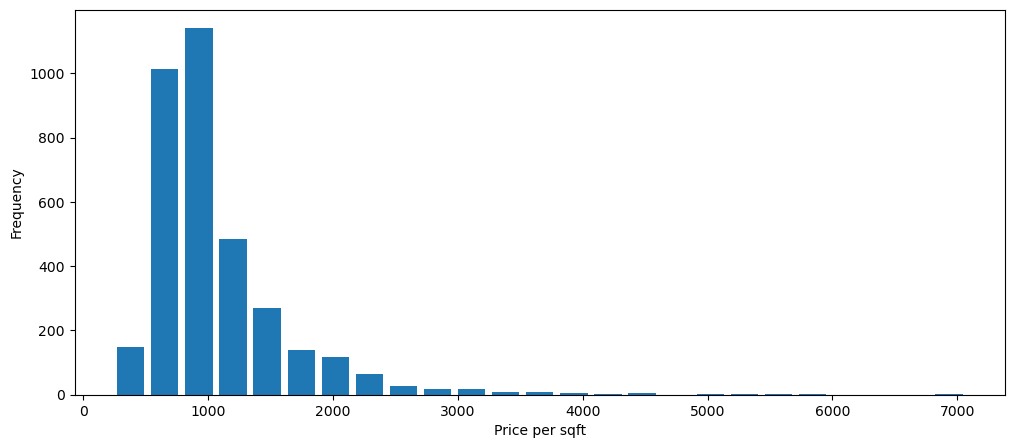

''

In [173]:
plt.hist(df_2['price per sqft'] ,bins = 25, rwidth = 0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Frequency')
plt.show()
;

<span style="color: darkblue; font-family: Calibri;">
I used 25 bins but will also check the number of bins sugegsted by the Square-Root Rule as it provides a simple and balanced bin count
and it works well for moderate-sized datasets - it avoids excessive granularity (too many bins) or oversimplification (too few bins):
</span>


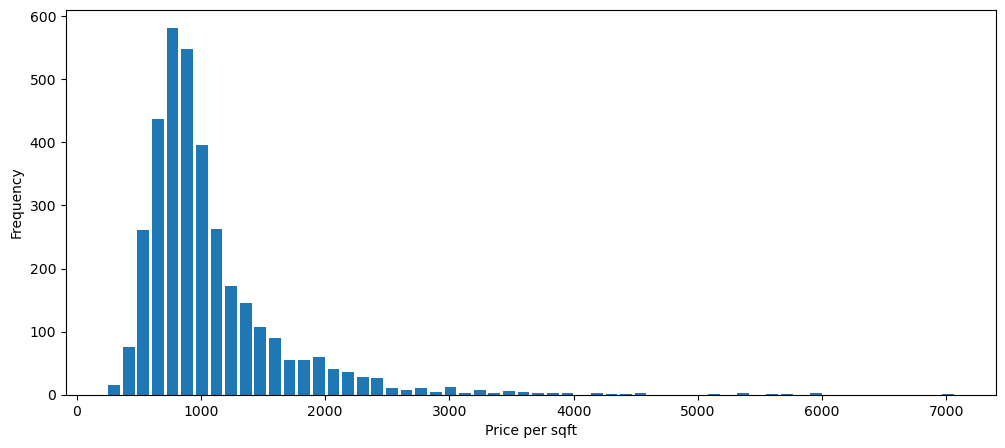

In [175]:
data = df_2['price per sqft']
bins = int(np.sqrt(len(data))) 
plt.hist(data, bins=bins, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Frequency')
plt.show();


In [177]:
bins

58

<span style="color: darkblue; font-family: Calibri;">
The suggested number of bins is 58 - it does show the data distribution very well, I can eyeball the outliers easily. These are the insights gained from the histogram:<br>
- Right-Skewed Distribution; the histogram is heavily skewed to the right, meaning most properties have a lower price per square foot, with a long tail of higher-priced properties,<br>
- Most properties are priced relatively lower, but there are still higher-priced outliers - some properties have prices per sqft well above 3000, 4000, or even 7000, but these are very rare; this could indicate luxury properties or special cases like high-end apartments in prime areas.
</span>


<span style="color: darkblue; font-family: Calibri;">
I would like to check the locations with the highest price per property and the highest average price of properties per location to determine which areas of London are the most expensive:
</span>

In [179]:
df_2.sort_values('price per sqft', ascending = False).head(5)

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,price per sqft
3057,1851,39750000.0,New development,5623,5,5,4,Mayfair,7069.18
2358,3453,9950000.0,Flat / Apartment,1682,2,2,1,Knightsbridge,5915.58
3058,1852,14250000.0,New development,2415,3,2,2,Mayfair,5900.62
3059,1861,8250000.0,New development,1455,2,2,1,Mayfair,5670.1
3073,3417,13750000.0,Penthouse,2476,3,2,2,Mayfair,5553.31


In [181]:
df_2[df_2['price per sqft']>4000]

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,price per sqft
2344,2789,19450000.0,Flat / Apartment,4699,5,5,3,Knightsbridge,4139.18
2358,3453,9950000.0,Flat / Apartment,1682,2,2,1,Knightsbridge,5915.58
2384,3352,34000000.0,House,7798,6,5,5,Belgravia,4360.09
2716,346,7500000.0,Flat / Apartment,1793,2,2,1,Fulham,4182.93
2731,3111,6950000.0,Flat / Apartment,1584,3,2,2,Knightsbridge,4387.63
3052,3404,11950000.0,New development,2347,2,2,1,Mayfair,5091.61
3057,1851,39750000.0,New development,5623,5,5,4,Mayfair,7069.18
3058,1852,14250000.0,New development,2415,3,2,2,Mayfair,5900.62
3059,1861,8250000.0,New development,1455,2,2,1,Mayfair,5670.1
3061,3218,18950000.0,Flat / Apartment,3541,4,4,3,Mayfair,5351.6


In [183]:
(pd.DataFrame(df_2
              .groupby('location')['price per sqft']
              .mean().round(2))
              .sort_values('price per sqft', ascending = False).head(20).index)

Index(['Piccadilly', 'Mayfair', 'Lots Road', 'Knightsbridge', 'Lillie Square',
       'Connaught Village', 'Marloes Road', 'Belgravia',
       'Duchessof Bedfords Walk', 'St.James's', 'Billingsgate', 'Earls Court',
       'Fitzrovia', 'Covent Garden', 'Soho', 'Great Portland Street',
       'Chelsea', 'Marylebone', 'Water Lane', 'Kensington'],
      dtype='object', name='location')

<span style="color: darkblue; font-family: Calibri;">
I would like to see the price distribution in the 20 most expensive areas of London (based on the above indices):
</span>

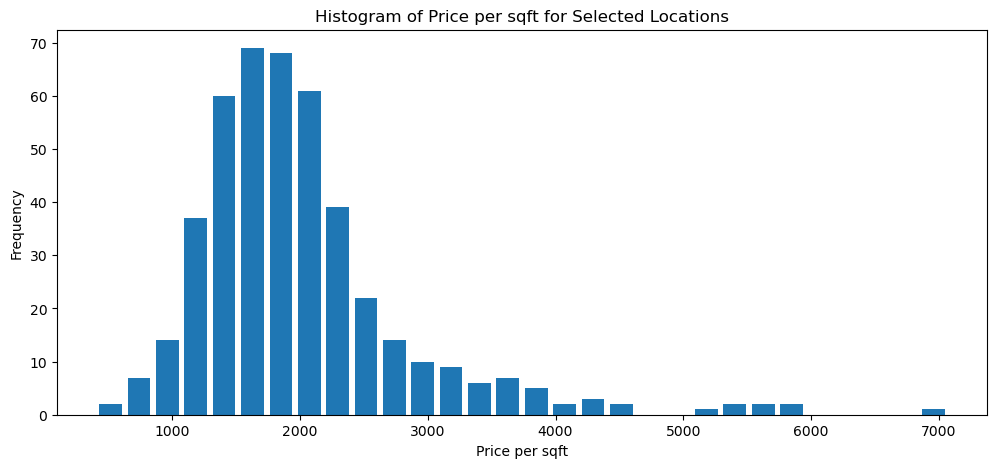

In [185]:
plt.hist(df_2[df_2['location'].isin(['Piccadilly', 'Mayfair', 'Lots Road', 'Knightsbridge', 'Lillie Square',
       'Connaught Village', 'Marloes Road', 'Belgravia',
       'Duchess of Bedfords Walk', "St.James's", 'Billingsgate', 'Earls Court',
       'Fitzrovia', 'Covent Garden', 'Soho', 'Great Portland Street',
       'Chelsea', 'Marylebone', 'Water Lane', 'Kensington'])]['price per sqft'], bins=30, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Frequency')
plt.title('Histogram of Price per sqft for Selected Locations')
plt.show();


In [187]:
df_2[df_2['location'].isin(['Piccadilly', 'Mayfair', 'Lots Road', 'Knightsbridge', 'Lillie Square',
       'Connaught Village', 'Marloes Road', 'Belgravia',
       'Duchess of Bedfords Walk', "St.James's", 'Billingsgate', 'Earls Court',
       'Fitzrovia', 'Covent Garden', 'Soho', 'Great Portland Street',
       'Chelsea', 'Marylebone', 'Water Lane', 'Kensington'])].describe()

,no,price,sqft,bedrooms,bathrooms,receptions,price per sqft
count,445.000000,445.0,445.000000,445.0,445.0,445.0,445.0
mean,1879.029213,4058422.334831,1834.602247,2.847191,2.422472,1.88764,2014.305438
std,1087.201371,4385368.103574,1382.368266,1.299349,1.133613,1.024895,858.522536
min,8.000000,395000.0,358.000000,1.0,1.0,1.0,406.79
25%,908.000000,1495000.0,945.000000,2.0,2.0,1.0,1485.15
50%,1861.000000,2750000.0,1455.000000,3.0,2.0,2.0,1863.9
75%,2912.000000,4750000.0,2231.000000,3.0,2.0,2.0,2267.88
max,3478.000000,39750000.0,9053.000000,9.0,6.0,5.0,7069.18


<span style="color: darkblue; font-family: Calibri;">
The average price of the properties in those 20 locations are siginificantly higher than the average price for all the locations in my dataset, the presence of very high-priced properties (outliers) in these areas can pull the mean price upwards, making it higher than the median price. This is consistent with the overall dataset, where the mean price is higher than the median price due to outliers.
</span>

In [189]:
df_2.head()

,no,price,house_type,sqft,bedrooms,bathrooms,receptions,location,price per sqft
0,1910,1900000.0,House,4558,5,3,3,Orpington,416.85
1,1122,1265000.0,House,2568,5,4,3,Epping,492.6
2,401,799999.0,House,1507,4,2,3,Essex,530.86
3,1573,535000.0,House,900,3,2,2,Epping,594.44
4,797,1350000.0,House,2312,4,4,3,Epping,583.91


<span style="color: darkblue; font-family: Calibri;">
When it comes to the visualisation part - I will stop here - I will do the full visualisation of my dataset in Tableau - that would be the second part of this project, I will move to the price prediction model now.
</span>

<span style="color: darkblue; font-family: Calibri; font-size: 20px;">
<b>PRICE PREDICTION MODEL<br>
</span>

<span style="color: darkblue; font-family: Calibri;">
It's time to start working on my price prediction model - as I have found the outliers in my dataset pulling the average price upwards I will create 2 models - the first one will be based on the dataset with the outliers (Model 1) and for the second model I will remove the outliers (Model 2) so I can compare the models performance.
</span>

<span style="color: darkblue; font-family: Calibri; font-size: 18px;">
<br>
    Model 1
</span>

<span style="color: darkblue; font-family: Calibri;">
I'd like to check the number of unique values in the column 'location'.
</span>

In [191]:
len(df_2['location'].unique())

249

<span style="color: darkblue; font-family: Calibri;">
For the purpuse of building my model I will reduce the DataFrame only to the columns that I need for this task.
</span>

In [193]:
df_3 = df_2.loc[:, ['no', 'price', 'sqft', 'bedrooms', 'bathrooms', 'receptions',
       'location', 'price per sqft']]

In [195]:
df_3.head()

,no,price,sqft,bedrooms,bathrooms,receptions,location,price per sqft
0,1910,1900000.0,4558,5,3,3,Orpington,416.85
1,1122,1265000.0,2568,5,4,3,Epping,492.6
2,401,799999.0,1507,4,2,3,Essex,530.86
3,1573,535000.0,900,3,2,2,Epping,594.44
4,797,1350000.0,2312,4,4,3,Epping,583.91


In [197]:
len(df_3['location'].unique())

249

In [199]:
df_3['location'].value_counts().sort_values()

location
Radlett            1
Marloes Road       1
Oxhey Village      1
Egerton Drive      1
Orpington          1
                ... 
Fulham           122
Clapham          123
Wandsworth       151
Putney           168
Battersea        216
Name: count, Length: 249, dtype: int64

<span style="color: darkblue; font-family: Calibri;">
Above, I sorted the locations from least to most popular in my dataset. Locations appearing fewer than six times I will group under 'Other':
</span>

In [201]:
df_3['location_2'] = np.where(df_3.groupby('location')['location'].transform('count')<4, 'Other', df_3['location'])

In [203]:
df_3.head(7)

,no,price,sqft,bedrooms,bathrooms,receptions,location,price per sqft,location_2
0,1910,1900000.0,4558,5,3,3,Orpington,416.85,Other
1,1122,1265000.0,2568,5,4,3,Epping,492.6,Other
2,401,799999.0,1507,4,2,3,Essex,530.86,Other
3,1573,535000.0,900,3,2,2,Epping,594.44,Other
4,797,1350000.0,2312,4,4,3,Epping,583.91,Other
5,434,1100000.0,3185,5,3,3,Coulsdon,345.37,Coulsdon
6,1997,630000.0,1596,4,3,3,Coulsdon,394.74,Coulsdon


In [205]:
len(df_3['location_2'].unique())

117

<span style="color: darkblue; font-family: Calibri;">
I have reduced the number of locations from 249 to 117 so I will drop the 'location' column.
</span>

In [207]:
df_4 = df_3.drop(['location', 'price per sqft'], axis = 1)

In [209]:
df_4.head(2)

,no,price,sqft,bedrooms,bathrooms,receptions,location_2
0,1910,1900000.0,4558,5,3,3,Other
1,1122,1265000.0,2568,5,4,3,Other


<span style="color: darkblue; font-family: Calibri;">
I will use one-hot encoding to convert my 'location' categorical variables into binary columns (a format that can be provided to machine learning algorithms to be used in my prediction model)
</span>

In [211]:
dummies = pd.get_dummies(df_4['location_2'])
dummies.head()

,Acton,Balham,Barnes,Battersea,Bayswater,Belgravia,Belsize Park,Blackheath,Bloomsbury,Bow,...,Wandsworth,Water Lane,Waterfront Drive,Watford,Westminster,Whitechapel,Wimbledon,Wood Lane,Woodford Green,Wornington
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<span style="color: darkblue; font-family: Calibri;">
I will drop the column 'Other'that will act as a reference category, the remaining columns represent the presence or absence of the other categories relative to this reference.
</span>

In [213]:
df_model_1 = pd.concat([df_4.drop(['no','location_2'], axis = 1), dummies.drop('Other', axis = 1)], axis = 1)
df_model_1.head(3)

,price,sqft,bedrooms,bathrooms,receptions,Acton,Balham,Barnes,Battersea,Bayswater,...,Wandsworth,Water Lane,Waterfront Drive,Watford,Westminster,Whitechapel,Wimbledon,Wood Lane,Woodford Green,Wornington
0,1900000.0,4558,5,3,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1265000.0,2568,5,4,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,799999.0,1507,4,2,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [215]:
df_model_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Columns: 121 entries, price to Wornington
dtypes: Float64(1), Int8(3), bool(116), int64(1)
memory usage: 472.5 KB


<span style="color: darkblue; font-family: Calibri;">
I will create my feature set - variable X - as Tthe 'price' column is the target variable I want to predict, it should not be included in variable X
</span>

In [217]:
X = df_model_1.drop(['price'], axis = 1)
X.head()

,sqft,bedrooms,bathrooms,receptions,Acton,Balham,Barnes,Battersea,Bayswater,Belgravia,...,Wandsworth,Water Lane,Waterfront Drive,Watford,Westminster,Whitechapel,Wimbledon,Wood Lane,Woodford Green,Wornington
0,4558,5,3,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2568,5,4,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1507,4,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,900,3,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2312,4,4,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<span style="color: darkblue; font-family: Calibri;">
I will create the target variable y by selecting the 'price' column from the DataFrame
</span>

In [219]:
y = df_model_1['price']
y.head()

0    1900000.0
1    1265000.0
2     799999.0
3     535000.0
4    1350000.0
Name: price, dtype: Float64

<span style="color: darkblue; font-family: Calibri;">
I will split my data into training and testing sets - 20% of the data will be used for testing - this allows me to train my model on one part of the data and test its performance on another part
</span>

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

<span style="color: darkblue; font-family: Calibri;">
Below I am training a linear regression model - I use the fit method to train the model on the training data (X_train and y_train) and the score method to evaluate the model on the testing data (X_test and y_test), returning the coefficient of determination R-squared
</span>

In [222]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)


0.7442393473126214

<span style="color: darkblue; font-family: Calibri;">
My R-squared value of 0.7442393473126214 is pretty good at predicting prices based on the provided information (location, size of the house, number of bedrooms, bathrooms, and receptions) - it tells you how much of the variation (or changes) in house prices can be explained by the given information - in this case the model explains about 74.5% of the variation in house prices.
    
</span>


<span style="color: darkblue; font-family: Calibri;">
Below I am doing the cross-validation on my linear regression model using the ShuffleSplit strategy. It splits the data into 5 different subsets, trains the model on 80% of the data, and tests it on the remaining 20%. This process is repeated 5 times, and the function returns the scores for each split.
</span>

In [225]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)


cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.71423459, 0.62678748, 0.68444423, 0.66077498, 0.68291343])

<span style="color: darkblue; font-family: Calibri;">
Below I am comparing different ML models to see which one performs best on my data using GridSearchCV technique.
</span>

In [227]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False], 
                'copy_X': [True, False], 
                'n_jobs': [None, 1, 2, 4], 
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.673831,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.673835,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.601878,"{'criterion': 'squared_error', 'splitter': 'ra..."


<span style="color: darkblue; font-family: Calibri;">
Based on the above results - I will stick to Linear Regression Model.
</span>

In [229]:
X.columns

Index(['sqft', 'bedrooms', 'bathrooms', 'receptions', 'Acton', 'Balham',
       'Barnes', 'Battersea', 'Bayswater', 'Belgravia',
       ...
       'Wandsworth', 'Water Lane', 'Waterfront Drive', 'Watford',
       'Westminster', 'Whitechapel', 'Wimbledon', 'Wood Lane',
       'Woodford Green', 'Wornington'],
      dtype='object', length=120)

In [231]:
X.shape

(3480, 120)

<span style="color: darkblue; font-family: Calibri;">
I will align the columns of the prediction data with the training data.
</span>

In [233]:
X = X.reindex(columns=X_train.columns, fill_value=0)
X.head(2)

,sqft,bedrooms,bathrooms,receptions,Acton,Balham,Barnes,Battersea,Bayswater,Belgravia,...,Wandsworth,Water Lane,Waterfront Drive,Watford,Westminster,Whitechapel,Wimbledon,Wood Lane,Woodford Green,Wornington
0,4558,5,3,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2568,5,4,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [235]:
X = X[X_train.columns]

<span style="color: darkblue; font-family: Calibri;">
The below function takes the input features (location, square footage, number of bedrooms, bathrooms, and receptions) and creates a feature array, uses the trained model to predict the price.<br>
I will add some additional formatting to the final result for better legibility:
</span>


In [237]:
def predict_price(location_2, sqft, bedrooms, bathrooms, receptions):
    if location_2 in X.columns:
        loc_index = np.where(X.columns == location_2)[0][0]
    else: loc_index = np.where(X.columns == 'Other')[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bedrooms
    x[2] = bathrooms
    x[3] = receptions
    if loc_index >= 0:
        x[loc_index] = 1

    predicted_price = lr_model.predict([x])[0]
    formatted_price = f"£{predicted_price:,.0f}"
    return f"The predicted price is {formatted_price}"


<span style="color: darkblue; font-family: Calibri;">
I will test my model on few examples:
</span>


In [239]:
print(predict_price('Notting Hill', 3000, 3,2,1))

The predicted price is £4,208,976


In [241]:
print(predict_price('Notting Hill', 3000, 3,2,2))

The predicted price is £4,615,431


In [243]:
print(predict_price('Belgravia', 8000, 3,3,3))

The predicted price is £13,935,677


<span style="color: darkblue; font-family: Calibri; font-size: 18px;">
<br>
    Model 2
</span>

<span style="color: darkblue; font-family: Calibri;">
I will check if my model performs better when I remove the outliers. I will use previously created variable df_3 as a starting point.
</span>


In [245]:
df_3.head()

,no,price,sqft,bedrooms,bathrooms,receptions,location,price per sqft,location_2
0,1910,1900000.0,4558,5,3,3,Orpington,416.85,Other
1,1122,1265000.0,2568,5,4,3,Epping,492.6,Other
2,401,799999.0,1507,4,2,3,Essex,530.86,Other
3,1573,535000.0,900,3,2,2,Epping,594.44,Other
4,797,1350000.0,2312,4,4,3,Epping,583.91,Other


In [247]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no              3480 non-null   int64  
 1   price           3480 non-null   Float64
 2   sqft            3480 non-null   int64  
 3   bedrooms        3480 non-null   Int8   
 4   bathrooms       3480 non-null   Int8   
 5   receptions      3480 non-null   Int8   
 6   location        3480 non-null   object 
 7   price per sqft  3480 non-null   Float64
 8   location_2      3480 non-null   object 
dtypes: Float64(2), Int8(3), int64(2), object(2)
memory usage: 190.4+ KB


In [249]:
df_3.describe()

,no,price,sqft,bedrooms,bathrooms,receptions,price per sqft
count,3480.000000,3480.0,3480.000000,3480.0,3480.0,3480.0,3480.0
mean,1739.500000,1864172.539943,1712.973563,3.106609,2.505172,2.006034,1066.249474
std,1004.733796,2267282.958162,1364.259351,1.512756,1.115867,1.058625,577.67231
min,0.000000,180000.0,274.000000,1.0,1.0,0.0,241.61
25%,869.750000,750000.0,834.000000,2.0,2.0,1.0,728.35
50%,1739.500000,1220000.0,1310.000000,3.0,2.0,2.0,904.76
75%,2609.250000,2150000.0,2157.250000,4.0,3.0,3.0,1205.9825
max,3479.000000,39750000.0,15405.000000,10.0,6.0,5.0,7069.18


In [251]:
df_3.shape

(3480, 9)

<span style="color: darkblue; font-family: Calibri;">
I will check the number of unique values in the column 'no' as I want to use this column to join 2 DataFrames after removing the outliers.
</span>


In [253]:
df_3['no'].nunique()

3480

<span style="color: darkblue; font-family: Calibri;">
I will create new DataFrame only with the numerical values
</span>


In [255]:
df_5 = df_3.loc[:, ['no', 'price']]
df_5.head(2)

,no,price
0,1910,1900000.0
1,1122,1265000.0


In [257]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      3480 non-null   int64  
 1   price   3480 non-null   Float64
dtypes: Float64(1), int64(1)
memory usage: 57.9 KB


<span style="color: darkblue; font-family: Calibri;">
I will set the 'no' column as the index of the DataFrame df_5.
</span>


In [259]:
df_5 = df_5.set_index('no')

In [261]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3480 entries, 1910 to 224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3480 non-null   Float64
dtypes: Float64(1)
memory usage: 57.8 KB


<span style="color: darkblue; font-family: Calibri;">
I will use the Z-score method to identify and remove outliers:
</span>


In [263]:
from scipy import stats

z_scores = np.abs(stats.zscore(df_5))
df_5 = df_5[(z_scores < 3).all(axis=1)]

In [265]:
df_5.head()

,price
no,
1910,1900000.0
1122,1265000.0
401,799999.0
1573,535000.0
797,1350000.0


In [267]:
df_5.shape

(3416, 1)

<span style="color: darkblue; font-family: Calibri;">
3416 rows have remained out of 3480 original rows of my dataset. I would like to see the summary of the satistics of my new dataFrame:
</span>


In [269]:
pd.options.display.float_format = '{:.2f}'.format
df_5.describe()

,price
count,3416.00
mean,1639520.04
std,1350819.38
min,180000.00
25%,735000.00
50%,1200000.00
75%,2000000.00
max,8650000.00


<span style="color: darkblue; font-family: Calibri;">
To be able to join my reduced dataFrame df_5 (with no outliers) with the rest of the dataset I will set the 'no' column as index in my initial dataFrame.
</span>


In [271]:
df_6 = df_3.set_index('no')

In [273]:
df_6.head()

,price,sqft,bedrooms,bathrooms,receptions,location,price per sqft,location_2
no,,,,,,,,
1910,1900000.00,4558,5,3,3,Orpington,416.85,Other
1122,1265000.00,2568,5,4,3,Epping,492.60,Other
401,799999.00,1507,4,2,3,Essex,530.86,Other
1573,535000.00,900,3,2,2,Epping,594.44,Other
797,1350000.00,2312,4,4,3,Epping,583.91,Other


In [275]:
df_6 = df_6.loc[:, ['sqft', 'bedrooms', 'bathrooms', 'receptions', 'location_2']]

In [277]:
df_6.head()

,sqft,bedrooms,bathrooms,receptions,location_2
no,,,,,
1910,4558,5,3,3,Other
1122,2568,5,4,3,Other
401,1507,4,2,3,Other
1573,900,3,2,2,Other
797,2312,4,4,3,Other


<span style="color: darkblue; font-family: Calibri;">
I will use the join method to combine my two DataFrames along their indices and I will check the shape of it to make sure I have the right number of rows and columns.
</span>

In [279]:
df_7 = df_5.join(df_6)

In [281]:
df_7.head()

,price,sqft,bedrooms,bathrooms,receptions,location_2
no,,,,,,
1910,1900000.00,4558,5,3,3,Other
1122,1265000.00,2568,5,4,3,Other
401,799999.00,1507,4,2,3,Other
1573,535000.00,900,3,2,2,Other
797,1350000.00,2312,4,4,3,Other


In [283]:
df_7.shape

(3416, 6)

<span style="color: darkblue; font-family: Calibri;">
I will continue following the steps of building my Model 1.
</span>

In [285]:
dummies_2 = pd.get_dummies(df_7['location_2'])
dummies_2.head()

,Acton,Balham,Barnes,Battersea,Bayswater,Belgravia,Belsize Park,Blackheath,Bloomsbury,Bow,...,Wandsworth,Water Lane,Waterfront Drive,Watford,Westminster,Whitechapel,Wimbledon,Wood Lane,Woodford Green,Wornington
no,,,,,,,,,,,,,,,,,,,,,
1910,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [287]:
df_7.shape

(3416, 6)

In [289]:
df_model_2 = pd.concat([df_7.drop(['location_2'], axis = 1), dummies_2.drop('Other', axis = 1)], axis = 1)
df_model_2.head(3)

,price,sqft,bedrooms,bathrooms,receptions,Acton,Balham,Barnes,Battersea,Bayswater,...,Wandsworth,Water Lane,Waterfront Drive,Watford,Westminster,Whitechapel,Wimbledon,Wood Lane,Woodford Green,Wornington
no,,,,,,,,,,,,,,,,,,,,,
1910,1900000.00,4558,5,3,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1122,1265000.00,2568,5,4,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401,799999.00,1507,4,2,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [291]:
X1 = df_model_2.drop(['price'], axis = 1)
X1.head()

,sqft,bedrooms,bathrooms,receptions,Acton,Balham,Barnes,Battersea,Bayswater,Belgravia,...,Wandsworth,Water Lane,Waterfront Drive,Watford,Westminster,Whitechapel,Wimbledon,Wood Lane,Woodford Green,Wornington
no,,,,,,,,,,,,,,,,,,,,,
1910,4558,5,3,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1122,2568,5,4,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401,1507,4,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1573,900,3,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
797,2312,4,4,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [293]:
y1 = df_model_2['price']
y1.head()

no
1910   1900000.00
1122   1265000.00
401     799999.00
1573    535000.00
797    1350000.00
Name: price, dtype: Float64

In [295]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=10)

In [297]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X1_train, y1_train)
lr_model.score(X1_test, y1_test)

0.6995233875343294

<span style="color: darkblue; font-family: Calibri;">
My Model 2, which was based on data after removing outliers, scored slightly worse at 0.6995 compared to Model 1's score of 0.7442. This means Model 1 performs better in explaining the variance in house prices, correctly predicting the price 74 times out of 100.
</span>

In [299]:
def predict_price(location_2, sqft, bedrooms, bathrooms, receptions):
    if location_2 in X1.columns:
        loc_index = np.where(X1.columns == location_2)[0][0]
    else: loc_index = np.where(X1.columns == 'Other')[0][0]

    x1 = np.zeros(len(X1.columns))
    x1[0] = sqft
    x1[1] = bedrooms
    x1[2] = bathrooms
    x1[3] = receptions
    if loc_index >= 0:
        x1[loc_index] = 1

    predicted_price = lr_model.predict([x1])[0]
    formatted_price = f"£{predicted_price:,.0f}"
    return f"The predicted price is {formatted_price}"


In [305]:
print(predict_price('Notting Hill', 2000, 3,2,1))

The predicted price is £2,775,008


In [307]:
print(predict_price('Notting Hill', 2000, 3,2,2))

The predicted price is £2,871,398


In [ ]:
df_3.to_excel('london_prices_model.xlsx', index=False)